# KNN Classification on IRIS Dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the style for seaborn
sns.set(style="whitegrid")


## Loading Dataset

In [2]:
# loading the dataset
file_path = "/kaggle/input/iris/Iris.csv"
df = pd.read_csv(file_path)
# Displaying the first few rows of the dataset
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Displaying the shape of the dataset
print("Shape of the dataset:", df.shape)
# Displaying the data types of the columns
print("Data types of the columns:\n", df.dtypes)
# Displaying the unique species in the dataset
print("Unique species in the dataset:", df['Species'].unique())


Shape of the dataset: (150, 6)
Data types of the columns:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
Unique species in the dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
# Plotting the distribution of each feature
def plot_feature_distribution(df):
    features = df.columns[1:-1]  # Exclude the 'Id' and 'Species' column
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


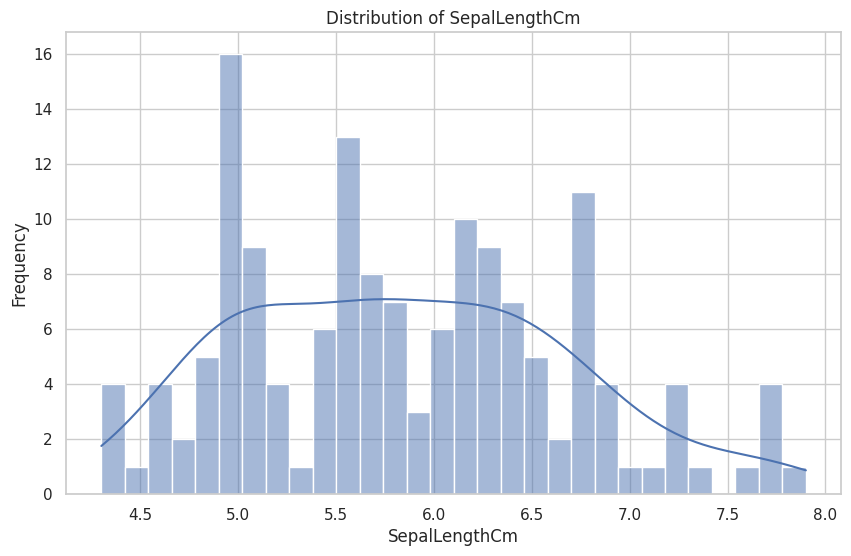

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


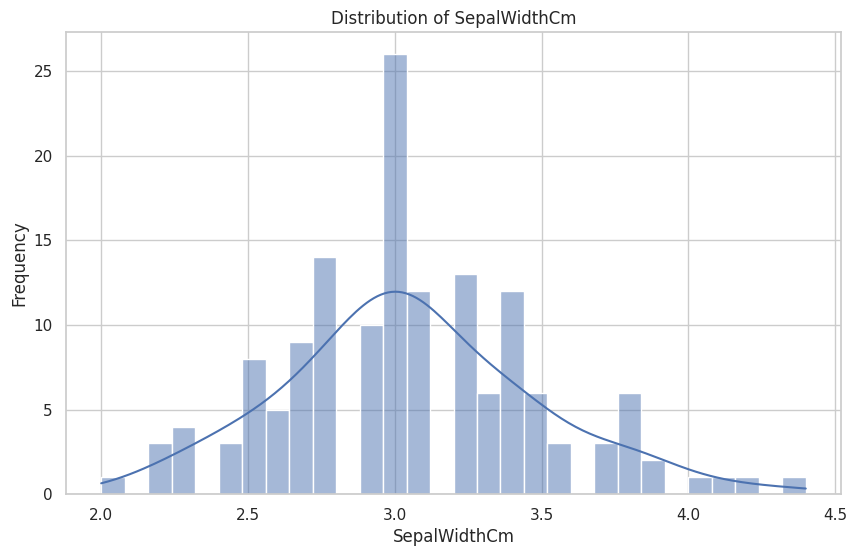

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


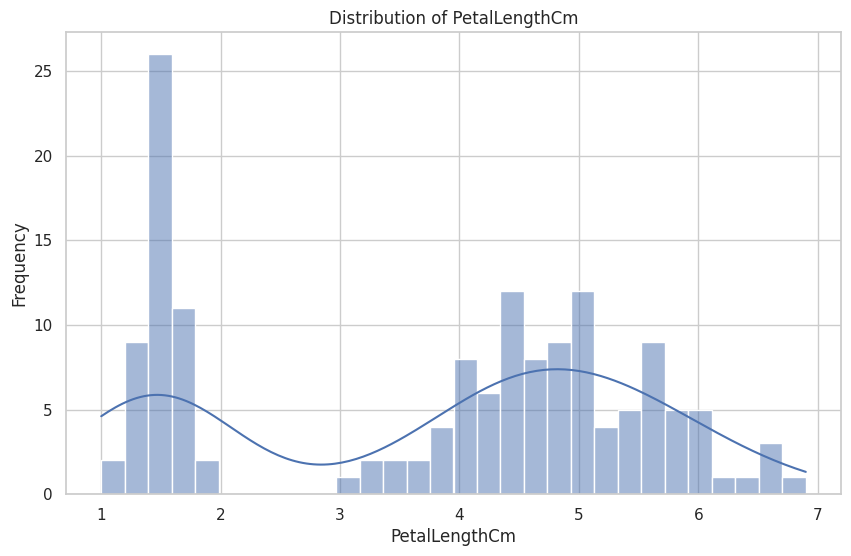

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


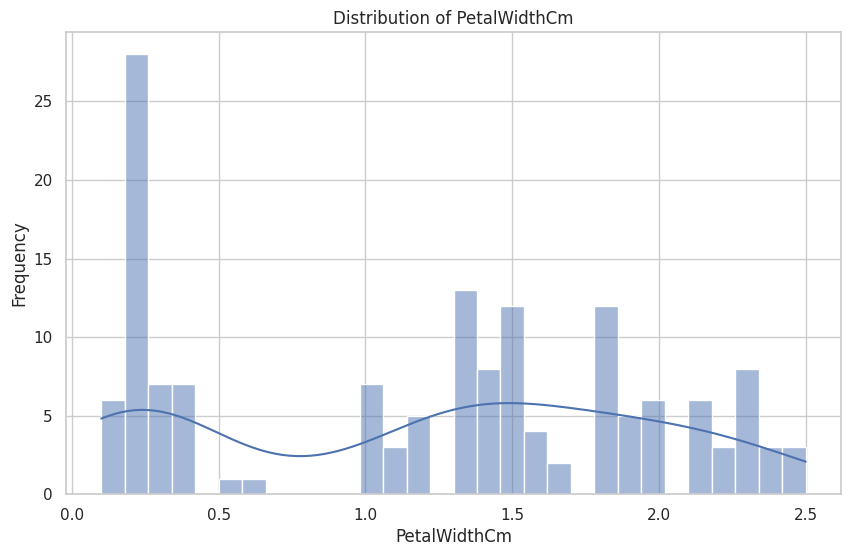

In [5]:
plot_feature_distribution(df)

## Train Test Splitting

In [6]:
# distributing data into test and train sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Displaying the shape of the training and testing sets
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of testing set:", X_test.shape, y_test.shape)


Shape of training set: (120, 4) (120,)
Shape of testing set: (30, 4) (30,)


## Random Forest Classifier Model Training

In [7]:
# model training using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


In [8]:
# evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
y_pred = rf_model.predict(X_test)
# Displaying the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Displaying accuracy and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
# Displaying F1 score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
F1 Score: 1.0


## KNN Model Training

In [9]:
# Training the model using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)
# Predicting the test set results
y_pred_knn = model.predict(X_test)

# Displaying the classification report for KNN
print("Classification Report KNN: ", classification_report(y_test, y_pred_knn))
# Displaying the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:\n", conf_matrix_knn)

# Displaying accuracy and F1 score for KNN
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print("F1 Score KNN:", f1_score(y_test, y_pred_knn, average='weighted'))



Classification Report KNN:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix KNN:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy KNN: 1.0
F1 Score KNN: 1.0


## Saving model to local system


In [10]:
# saving the trained model using joblib
import joblib
# Saving the KNN model
joblib.dump(model, 'knn_model.pkl')
# Displaying a message to indicate that the model has been saved
print("KNN model saved successfully as 'knn_model.pkl'.")


KNN model saved successfully as 'knn_model.pkl'.


## Saving Results in a PDF Report


In [11]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import Table, TableStyle
from reportlab.lib import colors

# Create a PDF file
pdf_file = "model_report.pdf"
c = canvas.Canvas(pdf_file, pagesize=letter)
# Set title and subtitle
c.setFont("Helvetica-Bold", 16)
c.drawString(100, 750, "Iris Dataset Model Report")
c.setFont("Helvetica", 12)
# Add model details
c.drawString(100, 730, "Model: KNN Classifier")
c.drawString(100, 710, "Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
c.drawString(100, 690, "F1 Score: {:.2f}".format(f1_score(y_test, y_pred_knn, average='weighted')))
# Add confusion matrix
conf_matrix_knn_str = "\n".join(["\t".join(map(str, row)) for row in conf_matrix_knn])
c.drawString(100, 670, "Confusion Matrix:")
# Create a table for the confusion matrix
data = [["Predicted"] + list(set(y_test))] + \
       [[str(label)] + list(row) for label, row in zip(set(y_test), conf_matrix_knn)]
table = Table(data)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black)
]))
# Draw the table on the PDF
table.wrapOn(c, 400, 200)
table.drawOn(c, 100, 500)
# Save the PDF
c.save()
print(f"Report saved as {pdf_file}.")
# Displaying a message to indicate that the report has been saved
print("Report saved successfully as 'model_report.pdf'.")


ModuleNotFoundError: No module named 'reportlab'